In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import time

import pickle

In [ ]:
NDARAA075AMK = {}
NDARAA075AMK['video1'] = pickle.load( open( "../../../data/NDARAA075AMK/EEG/raw/PANDA/NDARAA075AMK_Video1_data.pkl", "rb" ) )

In [ ]:
def get_fft(signal, ):
    

    sample_points = np.arange(signal.shape[0]) * dt
    ft = np.fft.fft(signal) * dt
    ft = ft[:len(sample_points)/2]
    freq = np.fft.fftfreq(len(sample_points), dt)
    freq = freq[:len(sample_points)/2]
    
    return ft, freq

def coherence(D, F_s=500, ft=None):
    dt = 1./F_s
    
    # First get samp freqs and all ffts
    #     sample_points = np.arange(D.shape[1]) * dt
    freq = np.fft.fftfreq(D.shape[1], dt)
    freq = freq[: D.shape[1]/2]
    if ft is None:
        ft = np.zeros((D.shape[0], D.shape[1]/2))
        for i in range(D.shape[0]):
            ft[i, :] = (np.fft.fft(signal) * dt)[: len(sample_points)/2]
    
    # Now run coherence on all combinations
    coherence = np.zeros((D.shape[0], D.shape[0]))
    for i in range(D.shape[0]):
        for j in range(j, D.shape[0]):
            coherence[i, j] = 

In [ ]:
def orig_coherence(D, F_s=500):
    times = []
    coherence = np.zeros((D.shape[0], D.shape[0]))
    for i in range(D.shape[0]):
        for j in range(i, D.shape[0]):
            start = time.time()
            coherence[i, j] = np.mean(signal.coherence(D[i, :], D[j, :], fs=500)[1])
            coherence[j, i] = coherence[i, j]
            end = time.time()
            times.append(end - start)
    return coherence, times

In [ ]:
pname = []

def par_coherence(D, F_s=500):
    NUM_WORKERS = multiprocessing.cpu_count() - 1
    
    coherence = np.zeros((D.shape[0], D.shape[0]))
    coherence_pars = [(i, j, D) for i in range(D.shape[0]) for j in range(i, D.shape[0])]
    
    pool = multiprocessing.Pool(processes=NUM_WORKERS)
    results = pool.map_async(get_coh, coherence_pars)
    coherence_vals = results.get()
    
    for ((i, j, D), val) in zip(coherence_pars, coherence_vals):
        coherence[i, j] = val
        coherence[j, i] = val
    
    return coherence

def get_coh(tup):
    i, j, D = tup[0], tup[1], tup[2]
    return np.mean(signal.coherence(D[i, :], D[j, :], fs=500)[1])

In [8]:
start_time = time.time()
coh = par_coherence(NDARAA075AMK['video1'])
end_time = time.time()
print end_time - start_time

/home/nitin/anaconda/lib/python2.7/site-packages/scipy/signal/spectral.py:627: RuntimeWarning: invalid value encountered in true_divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy
/home/nitin/anaconda/lib/python2.7/site-packages/scipy/signal/spectral.py:627: RuntimeWarning: invalid value encountered in true_divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy
/home/nitin/anaconda/lib/python2.7/site-packages/scipy/signal/spectral.py:627: RuntimeWarning: invalid value encountered in true_divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy
/home/nitin/anaconda/lib/python2.7/site-packages/scipy/signal/spectral.py:627: RuntimeWarning: invalid value encountered in true_divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy
/home/nitin/anaconda/lib/python2.7/site-packages/scipy/signal/spectral.py:627: RuntimeWarning: invalid value encountered in true_divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy
/home/nitin/anaconda/lib/python2.7/site-packages/scipy/signal/spectral.py:627: RuntimeWarning: invalid value encountered in true_divide
  Cxy = n

78.2269060612


In [11]:
coh_no_nan = np.nan_to_num(coh)

In [12]:
print coh_no_nan

[[ 1.          0.6552614   0.54535574 ...,  0.12402628  0.18929842  0.        ]
 [ 0.6552614   1.          0.56877714 ...,  0.12442437  0.19056506  0.        ]
 [ 0.54535574  0.56877714  1.         ...,  0.18289486  0.28784531  0.        ]
 ..., 
 [ 0.12402628  0.12442437  0.18289486 ...,  1.          0.24360545  0.        ]
 [ 0.18929842  0.19056506  0.28784531 ...,  0.24360545  1.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


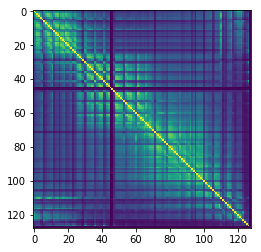

In [13]:
plt.imshow(coh_no_nan)
plt.show()

In [102]:
D = NDARAA075AMK['video1']
dat = [(i, j, D) for i in range(D.shape[0]) for j in range(i, D.shape[0])]

In [103]:
print dat

16384


In [26]:
coh_mat, coh_times = orig_coherence(NDARAA075AMK['video1'])

In [27]:
print sum(coh_times)

143.863338709


In [28]:
print np.mean(coh_times)

0.0174253074987


In [3]:
import os
import time
import threading
import multiprocessing
 
NUM_WORKERS = 4
 
def only_sleep():
    """ Do nothing, wait for a timer to expire """
    print "PID: %s, Process Name: %s, Thread Name: %s" % (
        os.getpid(),
        multiprocessing.current_process().name,
        threading.current_thread().name)
    
    time.sleep(1)
 
 
def crunch_numbers():
    """ Do some computations """
    print "PID: %s, Process Name: %s, Thread Name: %s" % (
        os.getpid(),
        multiprocessing.current_process().name,
        threading.current_thread().name)
    
    x = 0
    while x < 10000000:
        x += 1

In [42]:
## Run tasks serially
start_time = time.time()
for _ in range(NUM_WORKERS):
    only_sleep()
end_time = time.time()
 
print "Serial time=", end_time - start_time
 
# Run tasks using threads
start_time = time.time()
threads = [threading.Thread(target=only_sleep) for _ in range(NUM_WORKERS)]
[thread.start() for thread in threads]
[thread.join() for thread in threads]
end_time = time.time()
 
print "Threads time=", end_time - start_time
 
# Run tasks using processes
start_time = time.time()
processes = [multiprocessing.Process(target=only_sleep) for _ in range(NUM_WORKERS)]
[process.start() for process in processes]
[process.join() for process in processes]
end_time = time.time()
 
print "Parallel time=", end_time - start_time

PID: 10686, Process Name: MainProcess, Thread Name: MainThread
PID: 10686, Process Name: MainProcess, Thread Name: MainThread
PID: 10686, Process Name: MainProcess, Thread Name: MainThread
PID: 10686, Process Name: MainProcess, Thread Name: MainThread
Serial time= 4.00488901138
PID: 10686, Process Name: MainProcess, Thread Name: Thread-29 PID: 10686, Process Name: MainProcess, Thread Name: Thread-31PID: 10686, Process Name: MainProcess, Thread Name: Thread-30


PID: 10686, Process Name: MainProcess, Thread Name: Thread-32
Threads time= 1.00310111046
PID: 16070, Process Name: Process-41, Thread Name: MainThread
PID: 16073, Process Name: Process-42, Thread Name: MainThread
PID: 16074, Process Name: Process-43, Thread Name: MainThread
PID: 16077, Process Name: Process-44, Thread Name: MainThread
Parallel time= 1.04032897949


In [44]:
start_time = time.time()
processes = [multiprocessing.Process(target=crunch_numbers) for _ in range(NUM_WORKERS)]
[process.start() for process in processes]
[process.join() for process in processes]
end_time = time.time()
 
print("Parallel time=", end_time - start_time)

PID: 16103, Process Name: Process-49, Thread Name: MainThread
PID: 16104, Process Name: Process-50, Thread Name: MainThread
PID: 16107, Process Name: Process-51, Thread Name: MainThread
PID: 16110, Process Name: Process-52, Thread Name: MainThread
('Parallel time=', 0.600754976272583)


In [58]:
signal.coherence(NDARAA075AMK['video1'][0, :], NDARAA075AMK['video1'][1, :], fs=500)[1]

array([ 0.88099307,  0.88661027,  0.87754989,  0.87293094,  0.88655531,
        0.91478252,  0.85699731,  0.83221704,  0.84481382,  0.81531298,
        0.7997148 ,  0.79111218,  0.78772378,  0.79416299,  0.8088156 ,
        0.80719769,  0.80769145,  0.79982954,  0.77941388,  0.77725345,
        0.79187441,  0.79550624,  0.80178249,  0.81308669,  0.82937646,
        0.82692564,  0.79759377,  0.81774467,  0.82952273,  0.85848618,
        0.9932813 ,  0.99608874,  0.96761286,  0.80781323,  0.80357027,
        0.81086195,  0.80086762,  0.79009479,  0.78391838,  0.79108071,
        0.77760273,  0.77023882,  0.77409387,  0.766904  ,  0.76217246,
        0.7572847 ,  0.72281188,  0.72935492,  0.7623899 ,  0.75574112,
        0.72305399,  0.7435919 ,  0.71804816,  0.71595347,  0.7354216 ,
        0.73685211,  0.7216894 ,  0.67309755,  0.64615357,  0.65383989,
        0.70868784,  0.91222948,  0.89444232,  0.66755593,  0.63657176,
        0.62778831,  0.62068254,  0.62638474,  0.60046184,  0.59

In [14]:
import os, glob, re
import pandas as pd
BASE = "../../../data"
DATASET = "bids"
root = os.path.join(BASE, DATASET)
regex = "^%s/(?P<subject>[a-zA-Z0-9.]*)/(?P=subject)_(?P<task>[a-zA-Z0-9_]*).pkl$"%(root)
subjects = []
tasks = []
filenames = []
dimcolumns = []
for filename in glob.iglob(root + "/**/*.pkl", recursive=True):
    filenames.append(filename)
    subjects.append(re.search(regex, filename).group('subject'))
    tasks.append(re.search(regex, filename).group('task'))
    dimcolumns.append(True)
d = {
    'resource_path': filenames,
    'dim_column': dimcolumns,
    'subject': subjects,
    'task': tasks,
}
D = pd.DataFrame(d).iloc[:4]
df_path = "%s/%s_meta.csv" % (root, DATASET)
D.to_csv(df_path)

TypeError: iglob() got an unexpected keyword argument 'recursive'